In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import mode
from scipy.stats import skew
import seaborn as sns

## 1. Upgrade library package

In [2]:
pd.__version__

'1.2.4'

In [3]:
!pip install sns --upgrade

Requirement already up-to-date: sns in /Users/nanwang/opt/anaconda3/lib/python3.8/site-packages (0.1)


In [4]:
sns.__version__

'0.11.2'

In [5]:
!pip install scipy --upgrade 

Requirement already up-to-date: scipy in /Users/nanwang/opt/anaconda3/lib/python3.8/site-packages (1.8.0)


## 2. Data Description

In [6]:
#Read Diabetes Dataset from local folder
diabetes_dataset = pd.read_csv('/Users/nanwang/Library/Mobile Documents/com~apple~CloudDocs/Documents/MI/INF2178/Midterm/diabetes.csv')

### 2.1 Preview Data

In [7]:
#Display the first 20 rows from Diabetes Dataset
diabetes_dataset.head(20)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80              0        0  27.1   
13            1      189             60             23      846  30.1   
14            5      166             72             19      175  25.8   
15            7      100              0              0        0  30.0   
16            0      118             84             47      230  45.8   
17            7      107             74              0        0  29.6   
18            1      103             30             38       83  43.3   
19            1      115             70             30       96  34.6   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1  
12                     1.441   57        0  
13                     0.398   59        1  
14                     0.587   51        1  
15                     0.484   32        1  
16                     0.551   31        1  
17                     0.254   31        1  
18                     0.183   33        0  
19                     0.529   32        1

In [8]:
# Check number of rows and number of columns of a dataframe as an element.
diabetes_dataset.shape

(768, 9)

In [9]:
# Check the total number of elements present in dataframe
diabetes_dataset.size

6912

In [10]:
#Check the column name of the dataframe.
diabetes_dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
#Check non-null count and datatypes of each column of the dataframe.
diabetes_dataset.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
#Check if there were duplicate rows
df_dedupped = diabetes_dataset.drop_duplicates()
print(df_dedupped.shape)
print(diabetes_dataset.shape)

(768, 9)
(768, 9)


In [13]:
diabetes_dataset.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [14]:
diabetes_dataset[diabetes_dataset['Glucose'] == 0 ]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
75             1        0             48             20        0  24.7   
182            1        0             74             20       23  27.7   
342            1        0             68             35        0  32.0   
349            5        0             80             32        0  41.0   
502            6        0             68             41        0  39.0   

     DiabetesPedigreeFunction  Age  Outcome  
75                      0.140   22        0  
182                     0.299   21        0  
342                     0.389   22        0  
349                     0.346   37        1  
502                     0.727   41        1

In [15]:
diabetes_dataset[diabetes_dataset['BloodPressure'] == 0 ]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
7             10      115              0              0        0  35.3   
15             7      100              0              0        0  30.0   
49             7      105              0              0        0   0.0   
60             2       84              0              0        0   0.0   
78             0      131              0              0        0  43.2   
81             2       74              0              0        0   0.0   
172            2       87              0             23        0  28.9   
193           11      135              0              0        0  52.3   
222            7      119              0              0        0  25.2   
261            3      141              0              0        0  30.0   
266            0      138              0              0        0  36.3   
269            2      146              0              0        0  27.5   
300            0      167              0              0        0  32.3   
332            1      180              0              0        0  43.3   
336            0      117              0              0        0  33.8   
347            3      116              0              0        0  23.5   
357           13      129              0             30        0  39.9   
426            0       94              0              0        0   0.0   
430            2       99              0              0        0  22.2   
435            0      141              0              0        0  42.4   
453            2      119              0              0        0  19.6   
468            8      120              0              0        0  30.0   
484            0      145              0              0        0  44.2   
494            3       80              0              0        0   0.0   
522            6      114              0              0        0   0.0   
533            6       91              0              0        0  29.8   
535            4      132              0              0        0  32.9   
589            0       73              0              0        0  21.1   
601            6       96              0              0        0  23.7   
604            4      183              0              0        0  28.4   
619            0      119              0              0        0  32.4   
643            4       90              0              0        0  28.0   
697            0       99              0              0        0  25.0   
703            2      129              0              0        0  38.5   
706           10      115              0              0        0   0.0   

     DiabetesPedigreeFunction  Age  Outcome  
7                       0.134   29        0  
15                      0.484   32        1  
49                      0.305   24        0  
60                      0.304   21        0  
78                      0.270   26        1  
81                      0.102   22        0  
172                     0.773   25        0  
193                     0.578   40        1  
222                     0.209   37        0  
261                     0.761   27        1  
266                     0.933   25        1  
269                     0.240   28        1  
300                     0.839   30        1  
332                     0.282   41        1  
336                     0.932   44        0  
347                     0.187   23        0  
357                     0.569   44        1  
426                     0.256   25        0  
430                     0.108   23        0  
435                     0.205   29        1  
453                     0.832   72        0  
468                     0.183   38        1  
484                     0.630   31        1  
494                     0.174   22        0  
522                     0.189   26        0  
533                     0.501   31        0  
535                     0.302   23        1  
589                     0.342   25        0  
601   

In [16]:
diabetes_dataset[diabetes_dataset['SkinThickness'] == 0 ]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2              8      183             64              0        0  23.3   
5              5      116             74              0        0  25.6   
7             10      115              0              0        0  35.3   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
..           ...      ...            ...            ...      ...   ...   
757            0      123             72              0        0  36.3   
758            1      106             76              0        0  37.5   
759            6      190             92              0        0  35.5   
762            9       89             62              0        0  22.5   
766            1      126             60              0        0  30.1   

     DiabetesPedigreeFunction  Age  Outcome  
2                       0.672   32        1  
5                       0.201   30        0  
7                       0.134   29        0  
9                       0.232   54        1  
10                      0.191   30        0  
..                        ...  ...      ...  
757                     0.258   52        1  
758                     0.197   26        0  
759                     0.278   66        1  
762                     0.142   33        0  
766                     0.349   47        1  

[227 rows x 9 columns]

In [17]:
diabetes_dataset[diabetes_dataset['Insulin'] == 0 ]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
5              5      116             74              0        0  25.6   
7             10      115              0              0        0  35.3   
..           ...      ...            ...            ...      ...   ...   
761            9      170             74             31        0  44.0   
762            9       89             62              0        0  22.5   
764            2      122             70             27        0  36.8   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
5                       0.201   30        0  
7                       0.134   29        0  
..                        ...  ...      ...  
761                     0.403   43        1  
762                     0.142   33        0  
764                     0.340   27        0  
766                     0.349   47        1  
767                     0.315   23        0  

[374 rows x 9 columns]

In [18]:
diabetes_dataset[diabetes_dataset['BMI'] == 0 ]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
9              8      125             96              0        0  0.0   
49             7      105              0              0        0  0.0   
60             2       84              0              0        0  0.0   
81             2       74              0              0        0  0.0   
145            0      102             75             23        0  0.0   
371            0      118             64             23       89  0.0   
426            0       94              0              0        0  0.0   
494            3       80              0              0        0  0.0   
522            6      114              0              0        0  0.0   
684            5      136             82              0        0  0.0   
706           10      115              0              0        0  0.0   

     DiabetesPedigreeFunction  Age  Outcome  
9                       0.232   54        1  
49                      0.305   24        0  
60                      0.304   21        0  
81                      0.102   22        0  
145                     0.572   21        0  
371                     1.731   21        0  
426                     0.256   25        0  
494                     0.174   22        0  
522                     0.189   26        0  
684                     0.640   69        0  
706                     0.261   30        1

### 2.2 Data visualization before data cleaning 

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

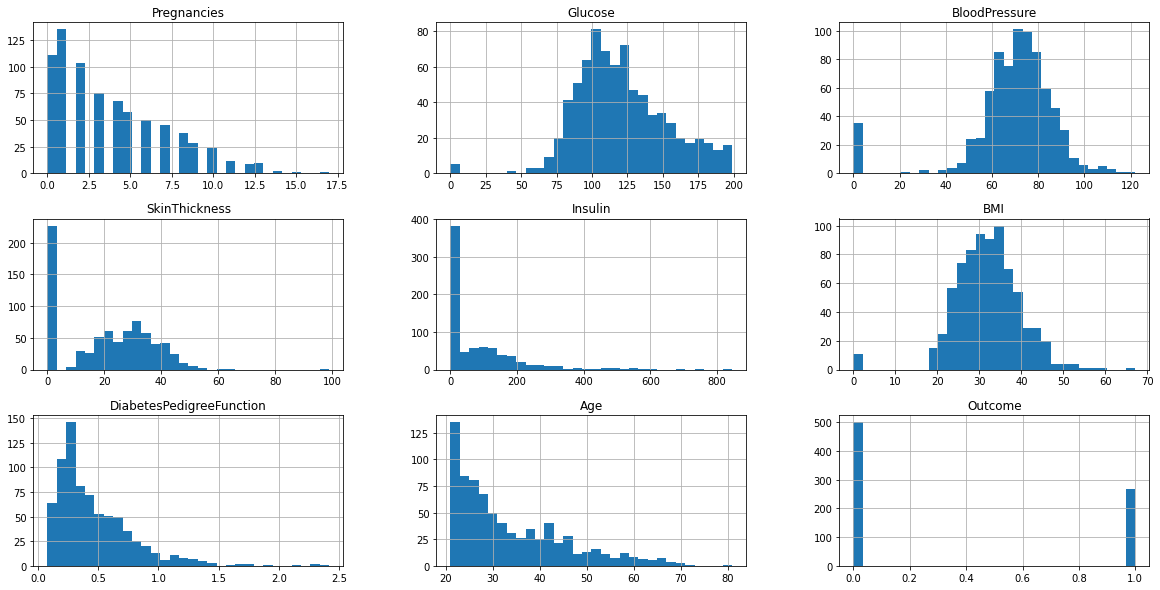

In [19]:
diabetes_dataset.hist(bins=30,figsize=(20,10))
#plt.savefig('histogram of each feature with the value of zero.png')

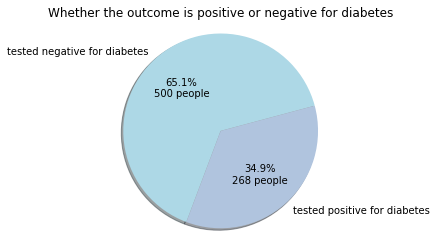

In [20]:
#Count Outcomes
diabetes_dataset['Outcome'].value_counts()

#Visualize Outcomes
my_labels = 'tested negative for diabetes','tested positive for diabetes'
counts = diabetes_dataset['Outcome'].value_counts()
my_colors = ['lightblue','lightsteelblue','silver']
my_autopac = lambda p:f'{p:.1f}%\n{p*sum(counts)/100 :.0f} people'
# Creating plot
plt.pie(counts, labels=my_labels, autopct=my_autopac, startangle=15, shadow = True, colors=my_colors)
plt.title('Whether the outcome is positive or negative for diabetes')
plt.axis('equal')

plt.show()
#plt.savefig('Proportion of people with diabetes vs. without diabetes.png')

## 3. Data Preparation and Cleaning

In [21]:
#Read Diabetes Dataset from local folder again
df = pd.read_csv('/Users/nanwang/Library/Mobile Documents/com~apple~CloudDocs/Documents/MI/INF2178/Midterm/diabetes.csv')

In [22]:
#On these columns, a value of zero was identified in dataset exploring. 
cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
#Zero does not make sense, so we will indicate them as missing value, replaced by NaN 
df[cols] = df[cols].replace({'0':np.nan, 0:np.nan})

In [23]:
df.sample(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
59             0    105.0           64.0           41.0    142.0  41.5   
639            1    100.0           74.0           12.0     46.0  19.5   
504            3     96.0           78.0           39.0      NaN  37.3   
157            1    109.0           56.0           21.0    135.0  25.2   
668            6     98.0           58.0           33.0    190.0  34.0   
596            0     67.0           76.0            NaN      NaN  45.3   
727            0    141.0           84.0           26.0      NaN  32.4   
208            1     96.0           64.0           27.0     87.0  33.2   
344            8     95.0           72.0            NaN      NaN  36.8   
110            3    171.0           72.0           33.0    135.0  33.3   

     DiabetesPedigreeFunction  Age  Outcome  
59                      0.173   22        0  
639                     0.149   28        0  
504                     0.238   40        0  
157                     0.833   23        0  
668                     0.430   43        0  
596                     0.194   46        0  
727                     0.433   22        0  
208                     0.289   21        0  
344                     0.485   57        0  
110                     0.199   24        1

In [24]:
#Showing the count of Nans
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

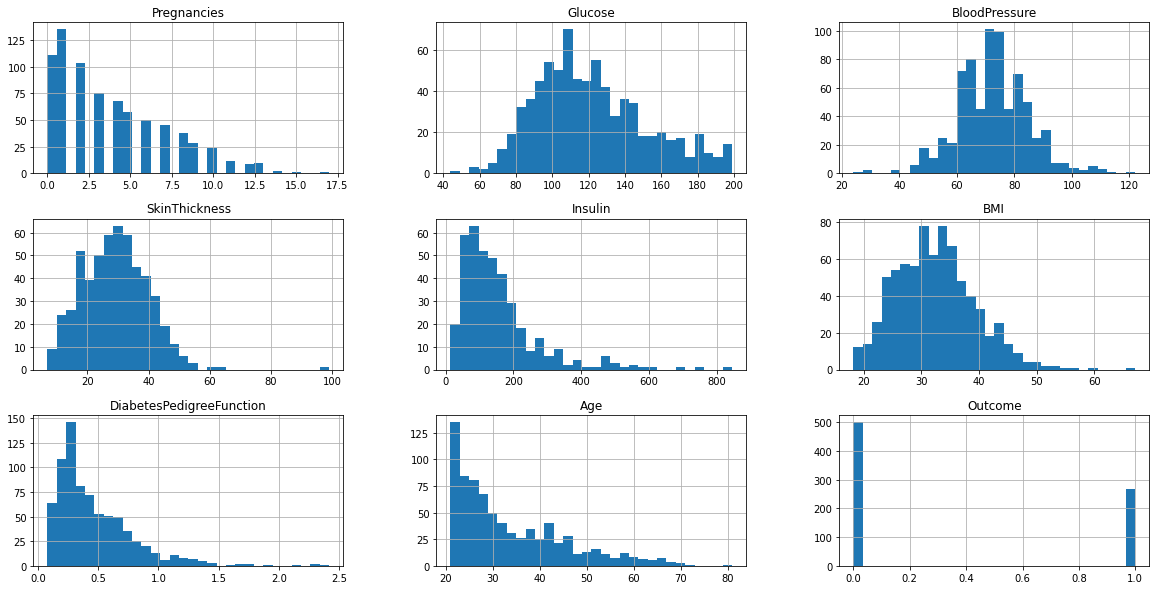

In [25]:
df.hist(bins=30,figsize=(20,10))
#plt.savefig('hisgram without a value of Zero.png')

In [26]:
#Replace NaN value by mean or median in accordance with thier distribution
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)

In [27]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.108073  140.671875   
std       3.369578   30.435949      12.096346       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [28]:
#Copy column 'Outcome', rename it to'Test'
df['Test'] = df['Outcome']

In [29]:
#Change numerical data of Test to categorical data
df['Test'] = pd.Categorical(df.Test)
df['Test'] = df['Test'].cat.rename_categories({1:"Positive", 0:"Negative"})
#Showing value type for each colomn
df.dtypes

Pregnancies                    int64
Glucose                      float64
BloodPressure                float64
SkinThickness                float64
Insulin                      float64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                        int64
Test                        category
dtype: object

In [30]:
# Add a new column category "Age Group" next to the Age column. 
category_1 = pd.cut(df['Age'], bins = [18,34,49,64,82], labels = ['Young','Middle','Older','Retirement'])
df.insert(8,'AgeGroup',category_1)
# Add a new column category "Glucose Level" next to the Glucose column. 
category_2 = pd.cut(df['Glucose'], bins = [0,140,200,300], labels = ['Normal','Prediabetes','Diabetes'])
df.insert(2,'GlucoseLevel',category_2)

In [31]:
# Check dataset after we add new column
df.sample(10)

Pregnancies  Glucose GlucoseLevel  BloodPressure  SkinThickness  Insulin  \
188            8    109.0       Normal           76.0           39.0    114.0   
87             2    100.0       Normal           68.0           25.0     71.0   
523            9    130.0       Normal           70.0           29.0    125.0   
585            1     93.0       Normal           56.0           11.0    125.0   
34            10    122.0       Normal           78.0           31.0    125.0   
216            5    109.0       Normal           62.0           41.0    129.0   
427            1    181.0  Prediabetes           64.0           30.0    180.0   
82             7     83.0       Normal           78.0           26.0     71.0   
343            5    122.0       Normal           86.0           29.0    125.0   
391            5    166.0  Prediabetes           76.0           29.0    125.0   

      BMI  DiabetesPedigreeFunction  Age AgeGroup  Outcome      Test  
188  27.9                     0.640   31    Young        1  Positive  
87   38.5                     0.324   26    Young        0  Negative  
523  34.2                     0.652   45   Middle        1  Positive  
585  22.5                     0.417   22    Young        0  Negative  
34   27.6                     0.512   45   Middle        0  Negative  
216  35.8                     0.514   25    Young        1  Positive  
427  34.1                     0.328   38   Middle        1  Positive  
82   29.3                     0.767   36   Middle        0  Negative  
343  34.7                     0.290   33    Young        0  Negative  
391  45.7                     0.340   27    Young        1  Positive

## 4. Exploratory Data Analysis

In [32]:
# Define features
features = list(df.columns[0:2])+list(df.columns[3:9])
print("Use Features: ", features)

Use Features:  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


### 4.1 Visualize Central Tendency, Dispersion, Skewness

In [33]:
# Function that analyze numerical feature
def descriptive_analysis(feature):
    print(f"Analysis of {feature}\n")
   #Central Tendency, Dispersion, Skewness
    print("Median: ", df[feature].median())
    print("Mean: ",df[feature].mean())
    print("Mode: ",df[feature].mode())
    print("Variance: ",df[feature].var())
    print("Standard deviation: ",df[feature].std())
    print("Skewness: ",df[feature].skew())
    print("Q1: ", df[feature].quantile(0.25))
    print("Q3: ", df[feature].quantile(0.75))
    
    print("============================Graph here============================")

    ax = sns.histplot(df[feature], kde=True,)
    ax.set_title(f"{feature} distribution")
    ax.axvline(np.median(df[feature]),color='b', linestyle='--', label="Median")
    ax.axvline(np.mean(df[feature]),color='r', linestyle='--', label="Mean")
    ax.axvline(mode(df[feature])[0],color='g', linestyle='--', label="Mode")
    ax.legend()
    plt.show()
     
    sns.boxplot(data = df, x = df[feature]).set_title(f"{feature}-Box plot")
    plt.show()

Analysis of Pregnancies

Median:  3.0
Mean:  3.8450520833333335
Mode:  0    1
dtype: int64
Variance:  11.35405632062142
Standard deviation:  3.3695780626988623
Skewness:  0.9016739791518588
Q1:  1.0
Q3:  6.0
============================Graph here============================


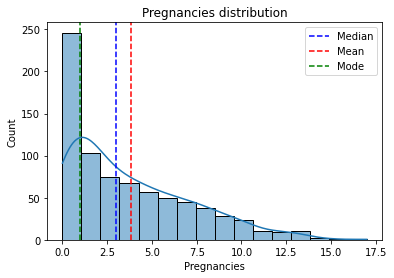

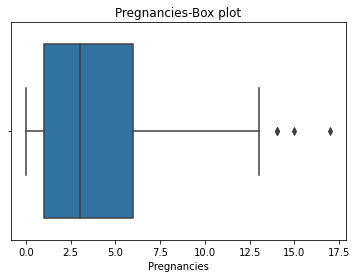

Analysis of Glucose

Median:  117.0
Mean:  121.68676277850587
Mode:  0     99.0
1    100.0
dtype: float64
Variance:  926.3469834472792
Standard deviation:  30.43594886720766
Skewness:  0.5327186599872982
Q1:  99.75
Q3:  140.25
============================Graph here============================


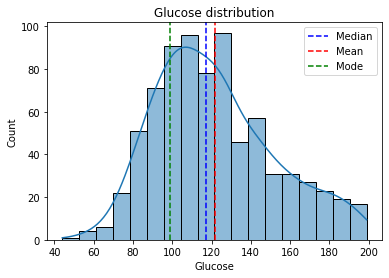

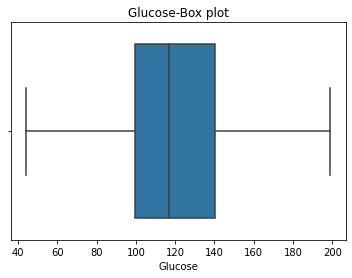

Analysis of BloodPressure

Median:  72.20259208731241
Mean:  72.40518417462486
Mode:  0    70.0
dtype: float64
Variance:  146.32159100408944
Standard deviation:  12.096346184037948
Skewness:  0.13730536744146796
Q1:  64.0
Q3:  80.0
============================Graph here============================


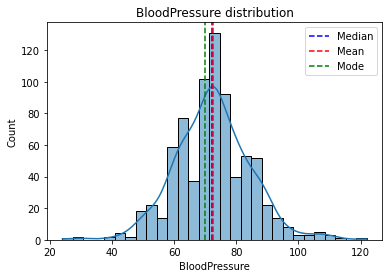

Analysis of SkinThickness

Median:  29.0
Mean:  29.108072916666668
Mode:  0    29.0
dtype: float64
Variance:  77.28556707681494
Standard deviation:  8.791221023089737
Skewness:  0.8376083316006523
Q1:  25.0
Q3:  32.0
============================Graph here============================


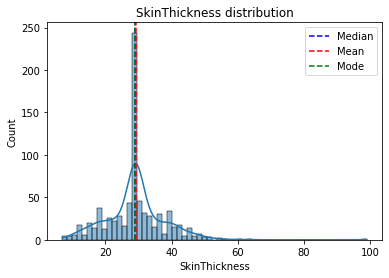

Analysis of Insulin

Median:  125.0
Mean:  140.671875
Mode:  0    125.0
dtype: float64
Variance:  7462.033001955671
Standard deviation:  86.383059693181
Skewness:  3.380019128212173
Q1:  121.5
Q3:  127.25
============================Graph here============================


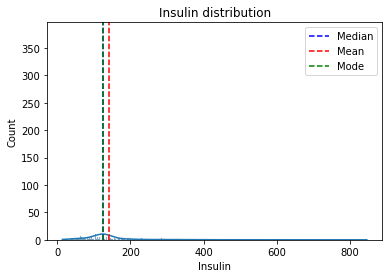

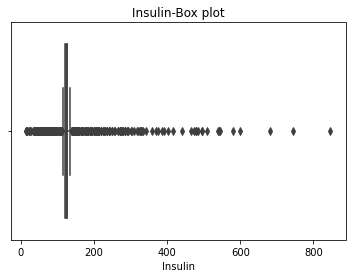

Analysis of BMI

Median:  32.3
Mean:  32.4552083333333
Mode:  0    32.3
dtype: float64
Variance:  47.26805627987832
Standard deviation:  6.875176818080996
Skewness:  0.599232520287425
Q1:  27.5
Q3:  36.6
============================Graph here============================


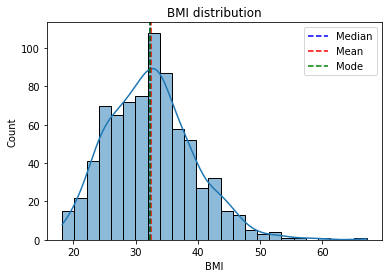

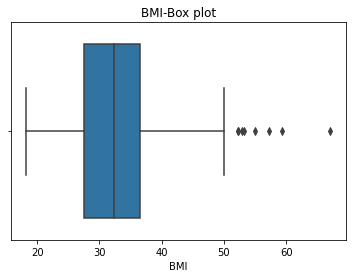

Analysis of DiabetesPedigreeFunction

Median:  0.3725
Mean:  0.4718763020833327
Mode:  0    0.254
1    0.258
dtype: float64
Variance:  0.10977863787313938
Standard deviation:  0.33132859501277484
Skewness:  1.919911066307204
Q1:  0.24375
Q3:  0.62625
============================Graph here============================


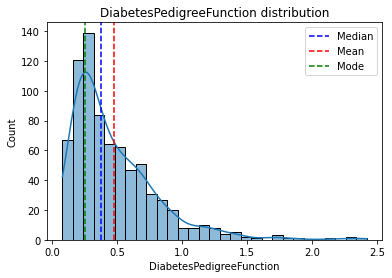

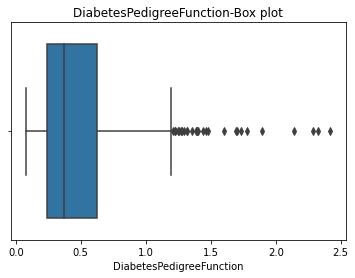

Analysis of Age

Median:  29.0
Mean:  33.240885416666664
Mode:  0    22
dtype: int64
Variance:  138.30304589037365
Standard deviation:  11.76023154067868
Skewness:  1.1295967011444805
Q1:  24.0
Q3:  41.0
============================Graph here============================


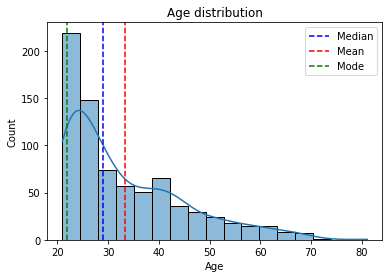

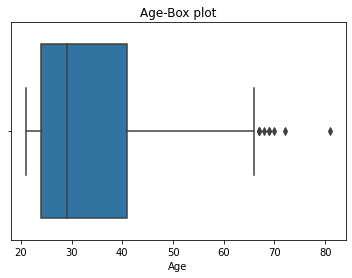

In [34]:
for i in features:
    descriptive_analysis(i)

### 4.2 Visualize the feature correlations

<AxesSubplot:>

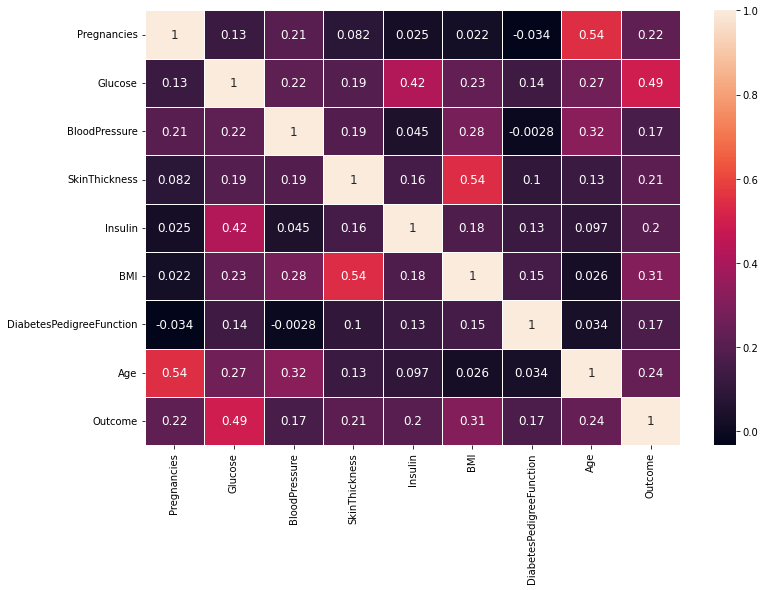

In [35]:
# Compute the correlation heatmap
corr = df.corr()
plt.figure(figsize=(12,8))  
sns.heatmap(corr,annot=True, annot_kws={"size":12}, linewidth = 0.5)
#plt.savefig('Correlation Matrix.png')

In [36]:
df['GlucoseLevel'].value_counts()

Normal         576
Prediabetes    192
Diabetes         0
Name: GlucoseLevel, dtype: int64

In [37]:
df['Test'].value_counts()

Negative    500
Positive    268
Name: Test, dtype: int64

### 4.3 Visualize relations between a single variable and the diabetes test result

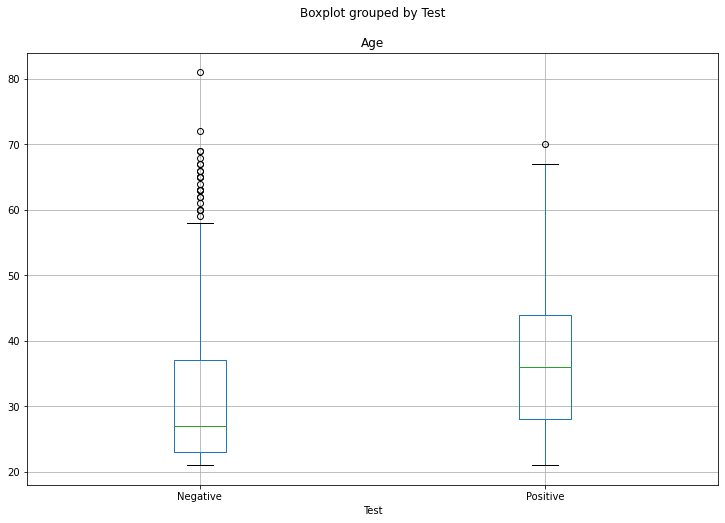

In [38]:
#Create boxplot to see the data distribution of Age by Test Result
df.boxplot('Age', by='Test',figsize=(12,8))
plt.show()

In [39]:
#Create boxplot to see the data distribution of Pregnancies by Test Result
df.boxplot('Pregnancies', by='Test',figsize=(12,8))
plt.show()

In [40]:
#Create boxplot to see the data distribution of Glucose by Test Result
df.boxplot('Glucose', by='Test',figsize=(12,8))
plt.show()

In [41]:
#Create boxplot to see the data distribution of BloodPressure, by Test Result
df.boxplot('BloodPressure', by='Test',figsize=(12,8))
plt.show()

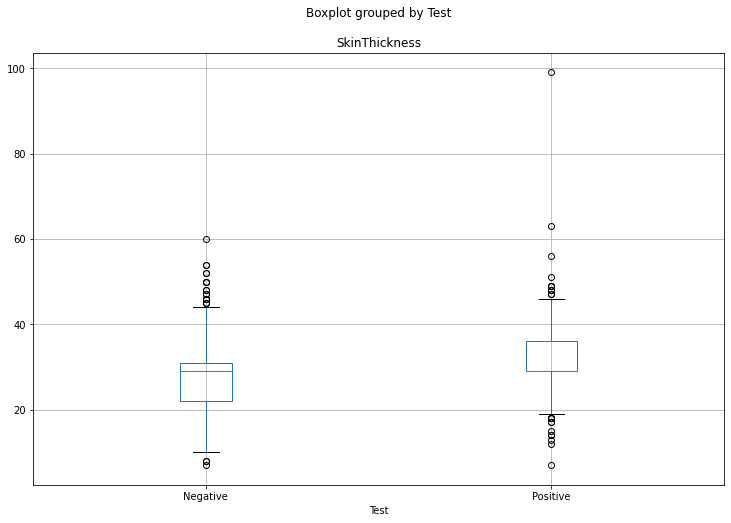

In [42]:
#Create boxplot to see the data distribution of SkinThickness, by Test Result
df.boxplot('SkinThickness', by='Test',figsize=(12,8))
plt.show()

In [43]:
#Create boxplot to see the data distribution of Insulin by Test Result
df.boxplot('Insulin', by='Test',figsize=(12,8))
plt.show()

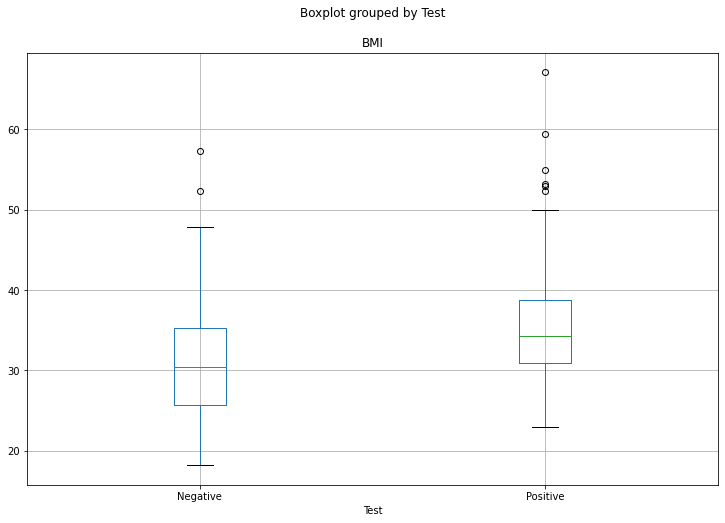

In [44]:
#Create boxplot to see the data distribution of BMI by Test Result
df.boxplot('BMI', by='Test',figsize=(12,8))
plt.show()

In [45]:
#Create boxplot to see the data distribution of DiabetesPedigreeFunction by Test Result
df.boxplot('DiabetesPedigreeFunction', by='Test',figsize=(12,8))
plt.show()

### 4.4 Visualize the comparison of a single feature between Age Groups

In [46]:
df['AgeGroup'].value_counts()

Young         488
Middle        191
Older          73
Retirement     16
Name: AgeGroup, dtype: int64

In [47]:
matrix = pd.crosstab(df['Outcome'], df['AgeGroup'])
matrix

AgeGroup  Young  Middle  Older  Retirement
Outcome                                   
0           362      92     34          12
1           126      99     39           4

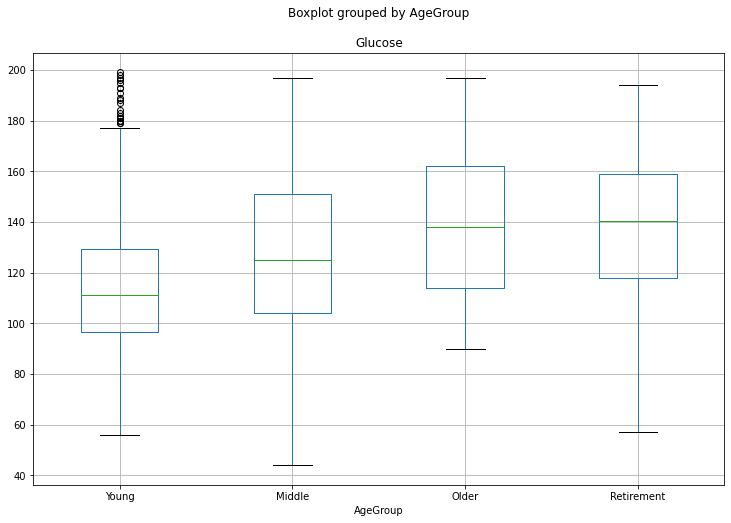

In [48]:
#Create boxplot to see the data distribution of Glucose by Age Groups
df.boxplot('Glucose', by='AgeGroup',figsize=(12,8))
plt.show()

In [49]:
#Create boxplot to see the data distribution of BloodPressure by Age Groups
df.boxplot('BloodPressure', by='AgeGroup',figsize=(12,8))
plt.show()

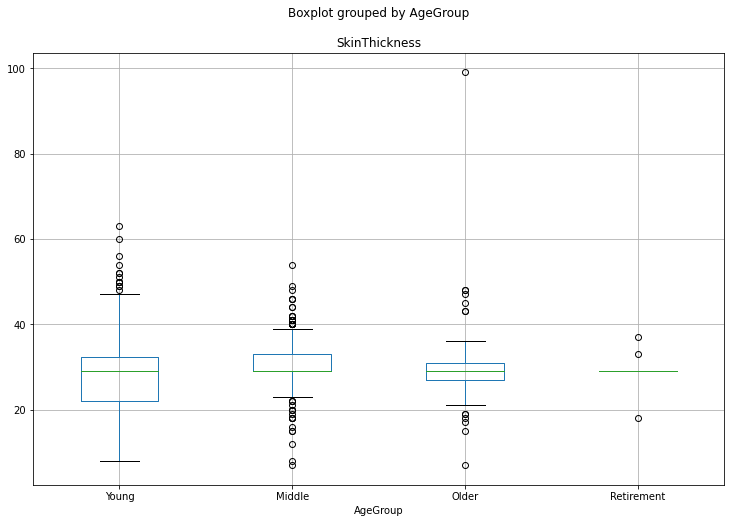

In [50]:
#Create boxplot to see the data distribution of SkinThickness by Age Groups
df.boxplot('SkinThickness', by='AgeGroup',figsize=(12,8))
plt.show()

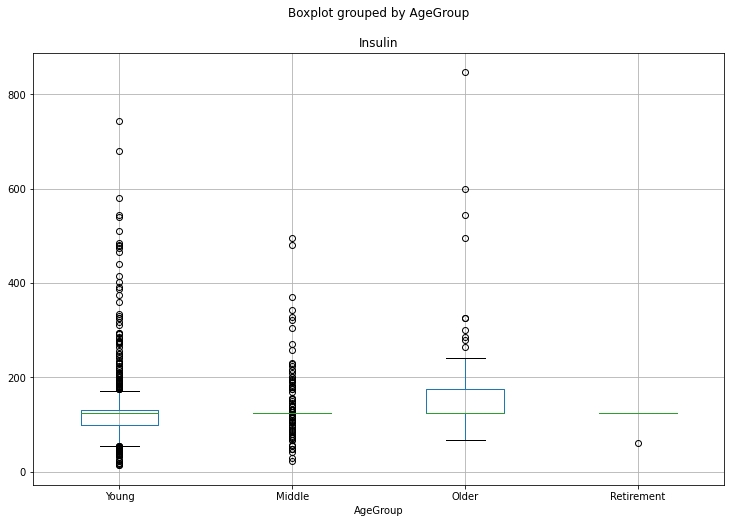

In [51]:
#Create boxplot to see the data distribution of Glucose by Age Groups
df.boxplot('Insulin', by='AgeGroup',figsize=(12,8))
plt.show()

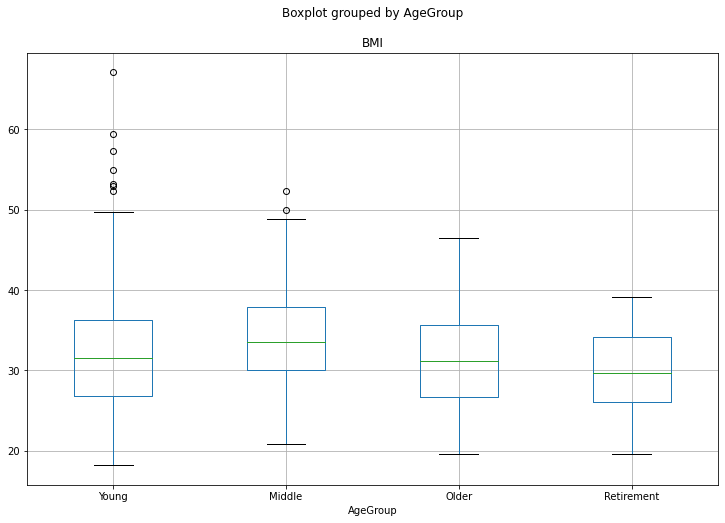

In [52]:
#Create boxplot to see the data distribution of BMI by Age Groups
df.boxplot('BMI', by='AgeGroup',figsize=(12,8))
plt.show()

### 4.5 Hypothesis Test

Student’s t-test: Any difference between the mean Blood Pressure of people with biabetes and people without diabetes under the t-test of 5% significance level.

Hypothesis statements:

H0: μ1 = μ2 (mean Blood Pressure of people with biabetes equal with mean Blood Pressure of people without diabetes)

H1: μ1 ≠ μ2 (mean Blood Pressure of people with biabetes differ from mean Blood Pressure of people without diabetes)


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    float64 
 2   GlucoseLevel              768 non-null    category
 3   BloodPressure             768 non-null    float64 
 4   SkinThickness             768 non-null    float64 
 5   Insulin                   768 non-null    float64 
 6   BMI                       768 non-null    float64 
 7   DiabetesPedigreeFunction  768 non-null    float64 
 8   Age                       768 non-null    int64   
 9   AgeGroup                  768 non-null    category
 10  Outcome                   768 non-null    int64   
 11  Test                      768 non-null    category
dtypes: category(3), float64(6), int64(3)
memory usage: 56.8 KB


In [54]:
df.groupby('Outcome')['BloodPressure'].describe()

count       mean        std   min   25%   50%   75%    max
Outcome                                                            
0        500.0  70.935397  11.931033  24.0  63.5  72.0  78.0  122.0
1        268.0  75.147324  11.945712  30.0  68.0  74.0  82.0  114.0

In [55]:
negative =df[(df['Outcome'] == 0)]
positive = df[(df['Outcome'] == 1)]

Before the t-test can be conducted, one needs to test the assumptions. First to test for the homogeneity of variances. To do this, I will use Levene’s test for homogeneity of variance. The method to conduct this test is stats.levene().

from source: https://pythonfordatascienceorg.wordpress.com/independent-t-test-python/

In [56]:
stats.levene(negative['BloodPressure'], positive['BloodPressure'])

LeveneResult(statistic=0.16393989544554366, pvalue=0.6856677964213963)

Next to test the assumption of normality. 

In [57]:
#Test the assumption of normality by visualizing the distribution
negative['BloodPressure'].plot(kind='hist', title='Blood Pressure for people without diabetes')
plt.xlabel('Blood Pressure Value)')
#plt.savefig('Blood Pressure for people without diabetes.png')

Text(0.5, 0, 'Blood Pressure Value)')

Text(0.5, 0, 'Blood Pressure value)')

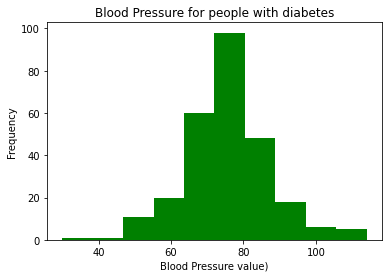

In [58]:
positive['BloodPressure'].plot(kind='hist', title='Blood Pressure for people with diabetes',color='green')
plt.xlabel('Blood Pressure value)')
#plt.savefig('Blood Pressure for people with diabetes.png')

In [59]:
stats.probplot(negative['BloodPressure'], dist="norm", plot= plt)
plt.title("BloodPressure value Q-Q Plot")
#plt.savefig("test_negative_for_diabetes_qqplot.png")

Text(0.5, 1.0, 'BloodPressure value Q-Q Plot')

Text(0.5, 1.0, 'BloodPressure value Q-Q Plot')

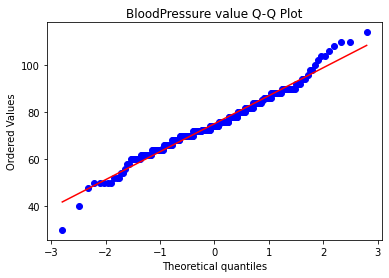

In [60]:
stats.probplot(positive['BloodPressure'], dist="norm", plot= plt)
plt.title("BloodPressure value Q-Q Plot")
#plt.savefig("test_positive_for_diabetes_qqplot.png")

In [61]:
stats.ttest_ind(negative['BloodPressure'], positive['BloodPressure'],equal_var= False)

Ttest_indResult(statistic=-4.659365773434451, pvalue=3.990682990682639e-06)

T-test: is mean Blood Pressure of people with biabetes greater than Blood Pressure of people without diabetes under the t-test of 5% significance level.

Hypothesis statements:

H0: μ1 = μ2 (mean Blood Pressure of people with biabetes equal with mean Blood Pressure of people without diabetes)

H1: μ1  > μ2 (mean Blood Pressure of people with biabetes is greater than mean Blood Pressure of people without diabetes)

In [62]:
stats.ttest_ind(negative['BloodPressure'], positive['BloodPressure'], equal_var= False, alternative='greater')

Ttest_indResult(statistic=-4.659365773434451, pvalue=0.9999980046585046)

## 5. Multiple Linear Regression

In [63]:
Y = df.BloodPressure
Y

0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: BloodPressure, Length: 768, dtype: float64

In [64]:
X = df.drop(['BloodPressure','GlucoseLevel','AgeGroup','Test'], axis =1)
X

Pregnancies  Glucose  SkinThickness  Insulin   BMI  \
0              6    148.0           35.0    125.0  33.6   
1              1     85.0           29.0    125.0  26.6   
2              8    183.0           29.0    125.0  23.3   
3              1     89.0           23.0     94.0  28.1   
4              0    137.0           35.0    168.0  43.1   
..           ...      ...            ...      ...   ...   
763           10    101.0           48.0    180.0  32.9   
764            2    122.0           27.0    125.0  36.8   
765            5    121.0           23.0    112.0  26.2   
766            1    126.0           29.0    125.0  30.1   
767            1     93.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 8 columns]

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=0) 

In [67]:
X_train.shape, Y_train.shape

((614, 8), (614,))

In [68]:
X_test.shape, Y_test.shape

((154, 8), (154,))

In [69]:
#Import liabrary
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [70]:
#Fitting Multiple Linear Regression to the training model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [71]:
#Apply trained model to make prediction on test set
Y_pred = regressor.predict(X_test)

In [72]:
compare = pd.DataFrame({'Actual':Y_test, 'Predicted':Y_pred})
compare

Actual  Predicted
661    76.0  75.776676
122    74.0  70.274819
113    62.0  69.303174
14     72.0  74.983179
529    65.0  67.367384
..      ...        ...
476    80.0  69.086385
482    58.0  68.502372
230    86.0  74.796316
527    74.0  67.864138
380    72.0  68.425669

[154 rows x 2 columns]

In [73]:
#Print model performance - coefficient
coeff_df = pd.DataFrame(regressor.coef_,X.columns, columns=['Coefficient'])
coeff_df

Coefficient
Pregnancies                  0.108761
Glucose                      0.054161
SkinThickness                0.022343
Insulin                     -0.010941
BMI                          0.482144
DiabetesPedigreeFunction    -2.086753
Age                          0.282852
Outcome                     -1.524326

In [74]:
#Print model performance - Intercept & R^2
print('Intercept:',regressor.intercept_)
print('Coefficient of determination (R^2):%.2f'% r2_score(Y_test, Y_pred))

Intercept: 42.82328474666568
Coefficient of determination (R^2):0.18


In [75]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(Y_test,Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test,Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

MAE: 8.463705569562846
MSE: 126.2377947095911
RMSE: 11.235559385699988


Text(0, 0.5, 'Predicted Y')

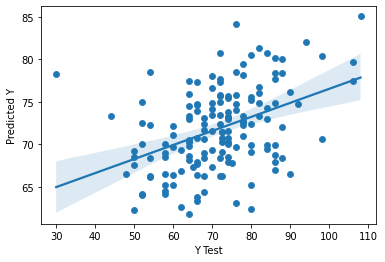

In [76]:
# Create a scatterplot of the real test values versus the predicted values.
sns.scatterplot(x=Y_test,y=Y_pred)
ax = sns.regplot(x=Y_test,y=Y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## 5. Anova Modeling

In [77]:
df

Pregnancies  Glucose GlucoseLevel  BloodPressure  SkinThickness  Insulin  \
0              6    148.0  Prediabetes           72.0           35.0    125.0   
1              1     85.0       Normal           66.0           29.0    125.0   
2              8    183.0  Prediabetes           64.0           29.0    125.0   
3              1     89.0       Normal           66.0           23.0     94.0   
4              0    137.0       Normal           40.0           35.0    168.0   
..           ...      ...          ...            ...            ...      ...   
763           10    101.0       Normal           76.0           48.0    180.0   
764            2    122.0       Normal           70.0           27.0    125.0   
765            5    121.0       Normal           72.0           23.0    112.0   
766            1    126.0       Normal           60.0           29.0    125.0   
767            1     93.0       Normal           70.0           31.0    125.0   

      BMI  DiabetesPedigreeFunction  Age AgeGroup  Outcome      Test  
0    33.6                     0.627   50    Older        1  Positive  
1    26.6                     0.351   31    Young        0  Negative  
2    23.3                     0.672   32    Young        1  Positive  
3    28.1                     0.167   21    Young        0  Negative  
4    43.1                     2.288   33    Young        1  Positive  
..    ...                       ...  ...      ...      ...       ...  
763  32.9                     0.171   63    Older        0  Negative  
764  36.8                     0.340   27    Young        0  Negative  
765  26.2                     0.245   30    Young        0  Negative  
766  30.1                     0.349   47   Middle        1  Positive  
767  30.4                     0.315   23    Young        0  Negative  

[768 rows x 12 columns]

### 5.1 Conduct a two-way ANOVA test

In [78]:
#Generate a boxplot to see the data distribution by Age Group and Test Result
sns.boxplot(x="AgeGroup", y="BloodPressure", hue="Test", data=df, palette="Set2")
#plt.savefig('data distribution of Blood Pressure by AgeGroups and Test Outcomes.png')

<AxesSubplot:xlabel='AgeGroup', ylabel='BloodPressure'>

In [79]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [80]:
#Conduct 2 way Anova, output the table
model = ols('BloodPressure ~ C(AgeGroup) + C(Test) + C(AgeGroup):C(Test)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
anova_table

sum_sq     df             F        PR(>F)
Intercept            1.715085e+06    1.0  13062.838841  0.000000e+00
C(AgeGroup)          5.948756e+03    3.0     15.102779  1.481417e-09
C(Test)              7.239284e+02    1.0      5.513756  1.912291e-02
C(AgeGroup):C(Test)  1.499345e+02    3.0      0.380656  7.669798e-01
Residual             9.978417e+04  760.0           NaN           NaN

### 5.2 Multiple pairwise comparisons (Post-hoc test)

In [81]:
#Import bioinfokit (v1.0.3 or later) for performing tukey HSD test
from bioinfokit.analys import stat

In [82]:
#Post hoc test for main effect Age 
res = stat()
res.tukey_hsd(df, res_var='BloodPressure', xfac_var='AgeGroup', anova_model='BloodPressure ~ C(AgeGroup) + C(Test) + C(AgeGroup):C(Test)')
res.tukey_summary

group1      group2      Diff     Lower      Upper    q-value   p-value
0   Older       Young  9.586710  5.884418  13.289002   9.428671  0.001000
1   Older      Middle  2.596455 -1.463156   6.656066   2.328884  0.353520
2   Older  Retirement  0.263338 -7.880594   8.407270   0.117742  0.900000
3   Young      Middle  6.990255  4.472179   9.508331  10.108243  0.001000
4   Young  Retirement  9.850048  2.354456  17.345639   4.785022  0.004182
5  Middle  Retirement  2.859793 -4.818578  10.538163   1.356179  0.747043

In [83]:
#post hoc test for main effect Test result
res.tukey_hsd(df, res_var='BloodPressure', xfac_var='Test', anova_model='BloodPressure ~ C(AgeGroup) + C(AgeGroup) + C(GlucoseLevel):C(AgeGroup)')
res.tukey_summary

/Users/nanwang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/Users/nanwang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 4
  warnings.warn('covariance of constraints does not have full '


group1    group2      Diff     Lower     Upper   q-value  p-value
0  Positive  Negative  4.211927  2.515011  5.908844  6.890897    0.001

In [88]:
#For interaction effect between age and diabetes test result
res.tukey_hsd(df, res_var='BloodPressure', xfac_var=['AgeGroup','Test'], anova_model='BloodPressure ~ C(AgeGroup) + C(AgeGroup) + C(GlucoseLevel):C(AgeGroup)')
res.tukey_summary

/Users/nanwang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/Users/nanwang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 4
  warnings.warn('covariance of constraints does not have full '


group1                  group2       Diff      Lower  \
0        (Older, Positive)       (Older, Negative)   2.018100  -6.124488   
1        (Older, Positive)       (Young, Positive)   8.462185   2.103062   
2        (Older, Positive)       (Young, Negative)  11.245217   5.396529   
3        (Older, Positive)      (Middle, Positive)   2.793833  -3.767052   
4        (Older, Positive)      (Middle, Negative)   4.335450  -2.295599   
5        (Older, Positive)  (Retirement, Positive)   5.423077 -12.796770   
6        (Older, Positive)  (Retirement, Negative)   2.709824  -8.746227   
7        (Older, Negative)       (Young, Positive)   6.444085  -0.262602   
8        (Older, Negative)       (Young, Negative)   9.227117   3.002299   
9        (Older, Negative)      (Middle, Positive)   0.775733  -6.122558   
10       (Older, Negative)      (Middle, Negative)   2.317350  -4.647707   
11       (Older, Negative)  (Retirement, Positive)   7.441176 -10.902870   
12       (Older, Negative)  (Retirement, Negative)   0.691725 -10.960843   
13       (Young, Positive)       (Young, Negative)   2.783032  -0.806544   
14       (Young, Positive)      (Middle, Positive)   5.668352   1.007544   
15       (Young, Positive)      (Middle, Negative)   4.126735  -0.632332   
16       (Young, Positive)  (Retirement, Positive)  13.885262  -3.739741   
17       (Young, Positive)  (Retirement, Negative)   5.752360  -4.731867   
18       (Young, Negative)      (Middle, Positive)   8.451384   4.515417   
19       (Young, Negative)      (Middle, Negative)   6.909767   2.857925   
20       (Young, Negative)  (Retirement, Positive)  16.668293  -0.779040   
21       (Young, Negative)  (Retirement, Negative)   8.535392  -1.647325   
22      (Middle, Positive)      (Middle, Negative)   1.541617  -3.483868   
23      (Middle, Positive)  (Retirement, Positive)   8.216910  -9.481890   
24      (Middle, Positive)  (Retirement, Negative)   0.084009 -10.523809   
25      (Middle, Negative)  (Retirement, Positive)   9.758527  -7.966402   
26      (Middle, Negative)  (Retirement, Negative)   1.625625  -9.025731   
27  (Retirement, Positive)  (Retirement, Negative)   8.132901 -11.903151   

        Upper   q-value   p-value  
0   10.160687  1.065310  0.900000  
1   14.821307  5.719805  0.001484  
2   17.093904  8.264286  0.001000  
3    9.354718  1.830349  0.900000  
4   10.966498  2.810269  0.491595  
5   23.642924  1.279372  0.900000  
6   14.165876  1.016722  0.900000  
7   13.150772  4.129991  0.070239  
8   15.451935  6.371406  0.001000  
9    7.674025  0.483356  0.900000  
10   9.282407  1.430088  0.900000  
11  25.785223  1.743582  0.900000  
12  12.344292  0.255157  0.900000  
13   6.372608  3.332506  0.264668  
14  10.329159  5.227470  0.005715  
15   8.885802  3.727182  0.144689  
16  31.510265  3.386264  0.245274  
17  16.236588  2.358335  0.682438  
18  12.387350  9.229376  0.001000  
19  10.961609  7.330047  0.001000  
20  34.115626  4.106369  0.073546  
21  18.718109  3.602929  0.177032  
22   6.567101  1.318543  0.900000  
23  25.915709  1.995541  0.835333  
24  10.691826  0.034040  0.900000  
25  27.483455  2.366441  0.679021  
26  12.276982  0.656011  0.900000  
27  28.168954  1.744734  0.900000

### 5.3 Test ANOVA assumptions

In [85]:
#Use Shapiro-Wilk to validate the assumptions for homogeneity of variances and normal distribution of residuals 
w, pvalue = stats.shapiro(res.anova_model_out.resid)
print(w, pvalue)

0.986817479133606 2.1179605482757324e-06


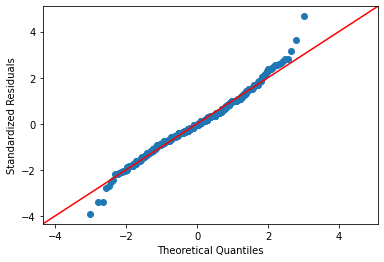

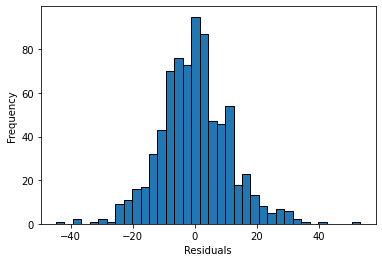

In [86]:
#Visual Approaches to validate the assumptions for homogeneity of variances and normal distribution of residuals
#Create residual plots 
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

#Create histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [87]:
#Use Levene’s test to check the assumption of homogeneity of variances
res = stat()
res.levene(df, res_var='BloodPressure', xfac_var=['AgeGroup', 'Test'])
res.levene_summary

Parameter   Value
0      Test statistics (W)  0.4747
1  Degrees of freedom (Df)  7.0000
2                  p value  0.8533